In [153]:
import numpy as np
import pandas as pd 

In [154]:
path = 'credit_risk_dataset_new.csv'
df = pd.read_csv(path)

In [155]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [157]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
num_cols = [col for col in df.columns if df[col].dtypes != 'object']

In [158]:
# check missing values
df.isnull().sum().sort_values() / df.shape[0]

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
person_emp_length             0.027470
loan_int_rate                 0.095639
dtype: float64

In [159]:
# fill missing values
interest_rate_mode = df['loan_int_rate'].mode()[0]
df['loan_int_rate'] = df['loan_int_rate'].fillna(interest_rate_mode)
age_list = df[df.person_emp_length.isnull() == True]['person_age'].unique()


In [160]:
# fill missing for employment length
for age in age_list:
    df.loc[((df['person_age']==age)&(df.person_emp_length.isnull() == True))\
           ,['person_emp_length']] = df[df['person_age']==age]['person_emp_length'].value_counts().idxmax()

In [161]:
df.person_emp_length.isnull().sum()

0

In [162]:
# Check data balance
df.loan_status.value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

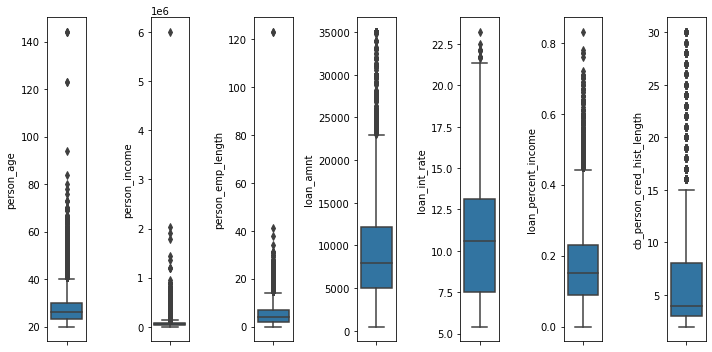

In [163]:
# check outliers
import matplotlib.pyplot as plt
import seaborn as sns
dfq = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(dfq)):
    plt.subplot(1,len(dfq),i+1)
    sns.boxplot(y=df[dfq[i]])
    plt.tight_layout()

In [164]:
# change datatype
df.person_emp_length = df.person_emp_length.astype('int64')

In [165]:
# drop outliers
# employment length > 100
df = df[df.person_emp_length < 100]
# Loai age > 100
df = df[df.person_age < 100]

# EDA

<AxesSubplot:>

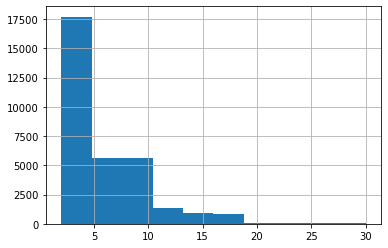

In [187]:
df.cb_person_cred_hist_length.hist()

<AxesSubplot:>

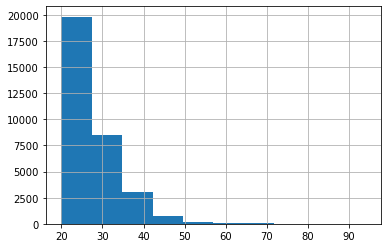

In [189]:
df.person_age.hist()

<AxesSubplot:>

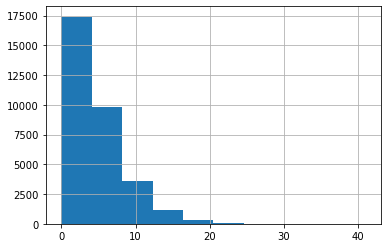

In [190]:
df.person_emp_length.hist()

### Missing values

In [169]:
df.duplicated().sum()

0

In [168]:
df.drop_duplicates(keep='first', inplace=True)

# Encoding

In [170]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [171]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
# label encode
df2.cb_person_default_on_file = LabelEncoder().fit_transform(df2['cb_person_default_on_file'])
# one hot encode
df2 = pd.get_dummies(df2, columns=['person_home_ownership', 'loan_intent'], drop_first=True)
# ordinal encode
df2.loan_grade = pd.Categorical(df2.loan_grade)
df2.loan_grade = df2.loan_grade.cat.codes

In [173]:
df2.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5,1,1000,11.14,0,0.10,0,2,0,1,0,1,0,0,0,0
2,25,9600,1,2,5500,12.87,1,0.57,0,3,0,0,0,0,0,1,0,0
3,23,65500,4,2,35000,15.23,1,0.53,0,2,0,0,1,0,0,1,0,0
4,24,54400,8,2,35000,14.27,1,0.55,1,4,0,0,1,0,0,1,0,0
5,21,9900,2,0,2500,7.14,1,0.25,0,2,0,1,0,0,0,0,0,1


# Feature Selection

In [174]:
# VIF (Variance Inflation Factor) checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df2.columns
vif_data['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
pd.set_option('display.max_rows', None)

# column's vif
vif_data.sort_values(by= 'VIF', ascending = False) #batas vif = 11

,feature,VIF
0,person_age,42.265058
5,loan_int_rate,31.297985
7,loan_percent_income,9.637547
9,cb_person_cred_hist_length,8.777718
4,loan_amnt,8.649632
3,loan_grade,7.691206
1,person_income,4.539759
2,person_emp_length,2.643473
12,person_home_ownership_RENT,2.587243
13,loan_intent_EDUCATION,2.149923


In [176]:
# đổi biến target về cuối cùng
df2 = df2[['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_status']]

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
person_age,1.000000,0.140487,0.154047,0.012912,0.051646,0.006999,-0.041468,0.006584,0.878240,-0.008220,-0.000680,-0.031515,-0.092549,0.076166,0.021289,0.034235,-0.013578,NaN
person_income,0.140487,1.000000,0.147678,-0.003481,0.316732,-0.002428,-0.294766,-0.002520,0.122654,0.011635,-0.044837,-0.209536,-0.016898,0.051652,-0.040265,0.007301,0.004199,-0.169262
person_emp_length,0.154047,0.147678,1.000000,-0.049595,0.107096,-0.052569,-0.053885,-0.030228,0.133386,-0.015550,0.029047,-0.232843,-0.037593,0.031823,-0.001744,0.007430,0.009257,-0.083193
loan_grade,0.012912,-0.003481,-0.049595,1.000000,0.145955,0.845252,0.122773,0.536726,0.014070,0.018347,-0.017048,0.120177,-0.008226,0.029687,0.001015,-0.006739,-0.010778,0.373398
loan_amnt,0.051646,0.316732,0.107096,0.145955,1.000000,0.131467,0.572632,0.039135,0.042139,0.013010,-0.026027,-0.116556,-0.008923,0.043003,-0.024304,-0.001186,-0.000953,0.105601
loan_int_rate,0.006999,-0.002428,-0.052569,0.845252,0.131467,1.000000,0.107454,0.453805,0.010313,0.013961,-0.010328,0.125949,-0.006913,0.022011,0.002934,0.000013,-0.009811,0.306383
loan_percent_income,-0.041468,-0.294766,-0.053885,0.122773,0.572632,0.107454,1.000000,0.035911,-0.031214,0.011203,0.050843,0.116645,-0.000363,-0.015682,0.013497,-0.003922,0.000784,0.379580
cb_person_default_on_file,0.006584,-0.002520,-0.030228,0.536726,0.039135,0.453805,0.035911,1.000000,0.004239,0.014538,-0.003617,0.060916,-0.006890,0.015116,-0.002712,-0.003349,-0.002955,0.179245
cb_person_cred_hist_length,0.878240,0.122654,0.133386,0.014070,0.042139,0.010313,-0.031214,0.004239,1.000000,-0.006657,0.004957,-0.026182,-0.078386,0.058666,0.016123,0.035453,-0.008556,-0.016441
person_home_ownership_OTHER,-0.008220,0.011635,-0.015550,0.018347,0.013010,0.013961,0.011203,0.014538,-0.006657,1.000000,-0.016787,-0.057886,-0.005375,0.000422,-0.003832,0.000035,0.009134,0.012835


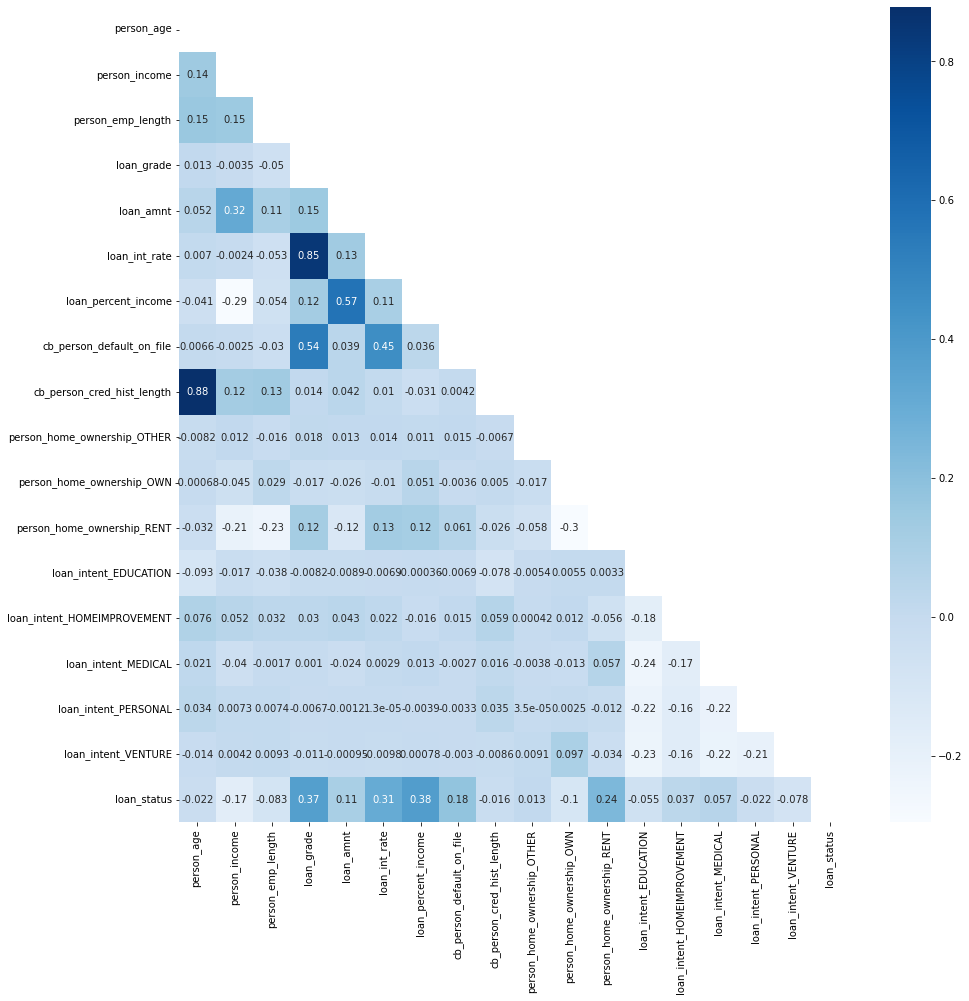

person_income                  0.169262
person_emp_length              0.083193
loan_grade                     0.373398
loan_amnt                      0.105601
loan_int_rate                  0.306383
loan_percent_income            0.379580
cb_person_default_on_file      0.179245
cb_person_cred_hist_length     0.016441
person_home_ownership_OTHER    0.012835
person_home_ownership_OWN      0.101937
person_home_ownership_RENT     0.238118
loan_intent_EDUCATION          0.055412
loan_intent_HOMEIMPROVEMENT    0.036603
loan_intent_MEDICAL            0.056654
loan_intent_PERSONAL           0.021681
loan_intent_VENTURE            0.078151
Name: loan_status, dtype: float64


The average value of the correlation with the target is:  0.13840579273309203


Correlation higher than correlation mean
person_income                 0.169262
loan_grade                    0.373398
loan_int_rate                 0.306383
loan_percent_income           0.379580
cb_person_default_on_file     0.179245
person_h

In [196]:
# Feature Selection (Pearson Correlation)
plt.figure(figsize = (15,15))
correl = df2.corr()
display(correl)
mask = np.triu(np.ones_like(correl, dtype=bool))
sns.heatmap(correl, annot = True, cmap = plt.cm.Blues, mask=mask)
plt.show()

print(abs(correl['loan_status'][1:-1]))
correl['loan_status'] = correl['loan_status'][1:-1]
corr_mean = abs(correl['loan_status'][1:-1]).mean()
print('\n')
print('The average value of the correlation with the target is: ', corr_mean)
print('\n')
print('Correlation higher than correlation mean')
high_corr = abs(correl['loan_status'][1:-1])[abs(correl['loan_status']) > corr_mean]
print(high_corr)

In [200]:
# Loai: loan_int_rate, person_age
df2.drop(columns=['loan_int_rate', 'person_age'], inplace=True)

# Model

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [203]:
# scale
min_max_cols = ['person_income', 'loan_amnt', 'cb_person_cred_hist_length']
for col in min_max_cols:
    df2[col] = MinMaxScaler().fit_transform(df2[[col]])

In [201]:
df2.head()

,person_income,person_emp_length,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
1,9600,5,1,1000,0.10,0,2,0,1,0,1,0,0,0,0,0
2,9600,1,2,5500,0.57,0,3,0,0,0,0,0,1,0,0,1
3,65500,4,2,35000,0.53,0,2,0,0,1,0,0,1,0,0,1
4,54400,8,2,35000,0.55,1,4,0,0,1,0,0,1,0,0,1
5,9900,2,0,2500,0.25,0,2,0,1,0,0,0,0,0,1,1


In [204]:
# Chia train, test
X = df2.drop(columns='loan_status')
y = df2.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.864237 (0.005505)
KNN: 0.816420 (0.007675)
DT: 0.841054 (0.005213)
SVM: 0.864569 (0.006999)
RF: 0.927054 (0.006933)


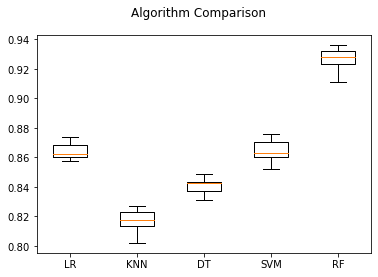

In [212]:
num_fold = 10
seed = 42
models = [('LR',LogisticRegression()),('KNN',KNeighborsClassifier()),('DT',DecisionTreeClassifier()),('SVM',SVC()),('RF',RandomForestClassifier())]
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    ### initialize KFOLD here. Choose n_splits = 10, random_state = 99. suffle = True
    kfold = KFold(n_splits=num_fold, random_state=seed, shuffle=True)

    #### Calculate auc_score for each model, assign the result to cv_result
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    #### append cv_result to results, append name to names
    msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning

In [214]:
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2'],
            'solver': ['newton-cg','lbfgs','liblinear'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
            'C' : [100,0.1,8,0.1]
        }
    },
    'Random_forest':{
        'model':RandomForestClassifier(),
        'params':{'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

In [216]:
# rf_model = RandomForestClassifier()
# rf_rs = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid,scoring='roc_auc')
# rf_rs.fit(X_train,y_train)

# print(rf_rs.best_score_)
# print(rf_rs.best_params_)
# rf_model = rf_rs.best_estimator_

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['params'],scoring='roc_auc')
    clf.fit(X_train,y_train) 
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.864348,"{'solver': 'newton-cg', 'penalty': 'l2', 'mult..."
1,Random_forest,0.928075,"{'n_estimators': 2000, 'min_samples_split': 2,..."
2,SVM_Classifier,0.871307,"{'kernel': 'rbf', 'gamma': 'auto'}"


In [218]:
pd.set_option('max_colwidth', None)
best

,model,best_score,best_params
0,Logistic_Regression,0.864348,"{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 8}"
1,Random_forest,0.928075,"{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}"
2,SVM_Classifier,0.871307,"{'kernel': 'rbf', 'gamma': 'auto'}"


## Logit Model

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7605
           1       0.71      0.49      0.58      2118

    accuracy                           0.85      9723
   macro avg       0.79      0.72      0.74      9723
weighted avg       0.84      0.85      0.84      9723


ROC_AUC score:
 0.8617697839314751



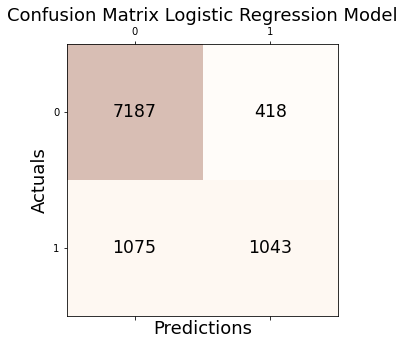

In [221]:
LR = LogisticRegression(solver= 'newton-cg', penalty= 'l2', multi_class= 'multinomial', C= 8).fit(X_train, y_train) 
yhat = LR.predict(X_test)
y_proba = LR.predict_proba(X_test)

# classification report
print('Classification report:\n', classification_report(y_test, yhat))
print('\nROC_AUC score:\n', roc_auc_score(y_test, y_proba[:, 1]))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

print("")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Logistic Regression Model', fontsize=18)
plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7605
           1       0.97      0.72      0.82      2118

    accuracy                           0.93      9723
   macro avg       0.95      0.85      0.89      9723
weighted avg       0.93      0.93      0.93      9723


ROC_AUC score:
 0.927802145474841



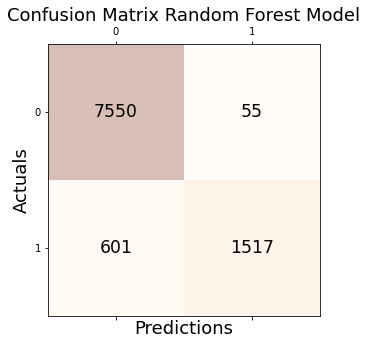

In [222]:
RF = RandomForestClassifier(n_estimators= 2000, min_samples_split= 2, min_samples_leaf= 4, 
                             max_features= 'auto', max_depth= 20, 
                             bootstrap= False).fit(X_train, y_train) 
yhat = RF.predict(X_test)
y_proba = RF.predict_proba(X_test)

# classification report
print('Classification report:\n', classification_report(y_test, yhat))
print('\nROC_AUC score:\n', roc_auc_score(y_test, y_proba[:, 1]))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

print("")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Random Forest Model', fontsize=18)
plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      7605
           1       0.91      0.46      0.61      2118

    accuracy                           0.87      9723
   macro avg       0.89      0.73      0.77      9723
weighted avg       0.88      0.87      0.86      9723


ROC_AUC score:
 0.8710937650358002



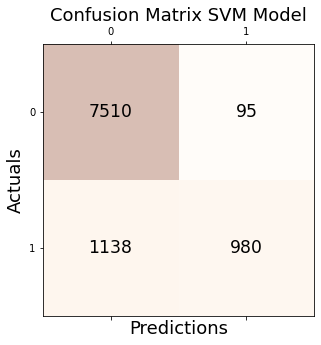

In [227]:
SVM = SVC(kernel= 'rbf', gamma= 'auto', probability=True).fit(X_train, y_train) 
yhat = SVM.predict(X_test)
y_proba = SVM.predict_proba(X_test)

print('Classification report:\n', classification_report(y_test, yhat))
print('\nROC_AUC score:\n', roc_auc_score(y_test, y_proba[:, 1]))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

print("")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix SVM Model', fontsize=18)
plt.show()